# 8章 プロットと可視化
## 8.1matplotlib APIの概要

In [5]:
import matplotlib.pyplot as plt

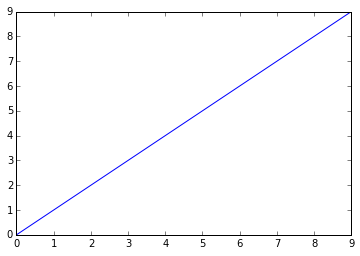

In [6]:
plt.plot(np.arange(10))

### 8.1.1 図とサブプロット

In [7]:
fig = plt.figure()

In [8]:
ax1 = fig.add_subplot(2,2,1)

In [9]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [10]:
from numpy.random import randn

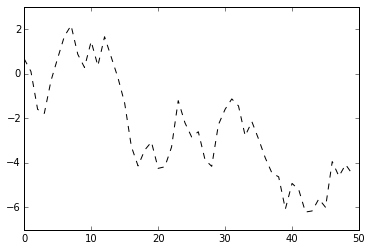

In [11]:
plt.plot(randn(50).cumsum(), 'k--')

In [12]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

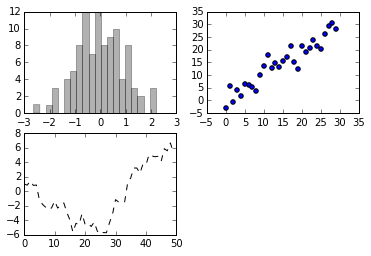

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
ax3.plot(randn(50).cumsum(), 'k--')

### 8.1.2 色、マーカ、線種

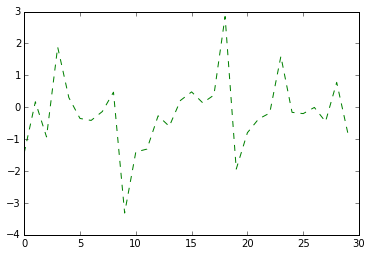

In [19]:
x = np.arange(30)
y = randn(30)
plt.plot(x, y, 'g--')

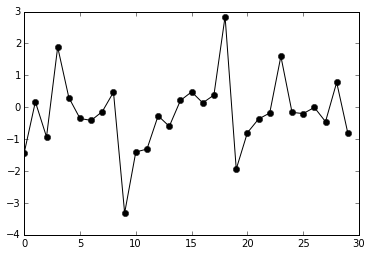

In [20]:
plt.plot(x, y, color='k', marker='o')

### 8.1.3 メモリ、ラベル、凡例

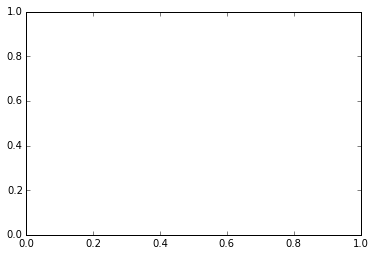

In [26]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)

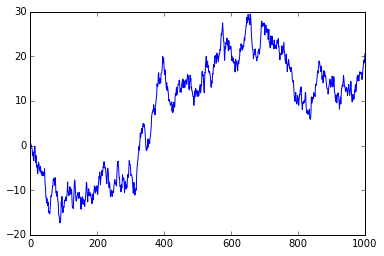

In [27]:
ax.plot(randn(1000).cumsum())
fig

In [28]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [29]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [30]:
ax.set_title('My first plot')

In [31]:
ax.set_xlabel('Stage')

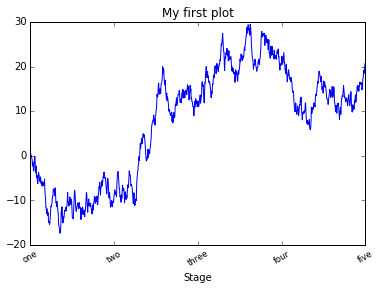

In [32]:
fig

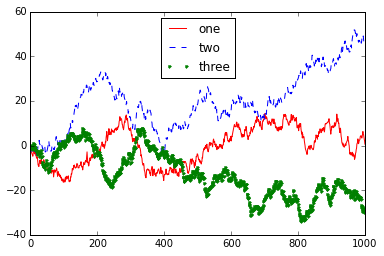

In [35]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'r', label='one')
ax.plot(randn(1000).cumsum(), 'b--', label='two')
ax.plot(randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

### 8.1.4 注釈やサブプロットへの描画

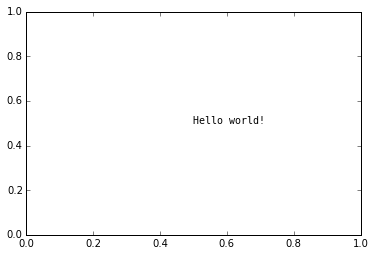

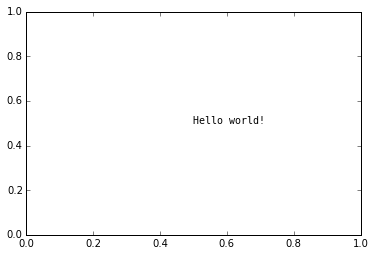

In [37]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.text(0.5,0.5, 'Hello world!', family='monospace', fontsize=10)
fig

In [38]:
import matplotlib.dates as dates
from datetime import datetime

In [39]:
font_option = {'sans-serif' : ['Hiragino Kaku Gothic Pro']}
plt.rc('font', **font_option)

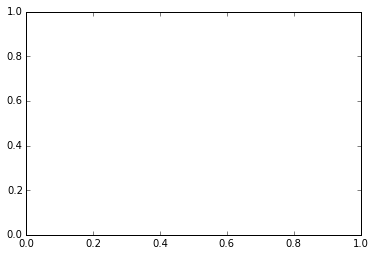

In [50]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('pydata-book/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
ax

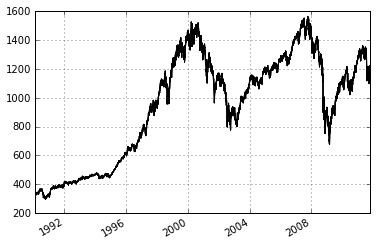

In [55]:
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), u'上昇相場のピーク'), 
    (datetime(2008, 3, 12), u'ベア・スターンズ危機'), 
    (datetime(2008, 9, 15), u'リーマン破綻')
]
crisis_data
fig

In [59]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

In [60]:
datefmt = dates.DateFormatter('%Y年%m月')
ax.xaxis.set_major_formatter(datefmt)

In [61]:
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title(u'2008〜2009年の金融危機の重要な日付')

In [62]:
###

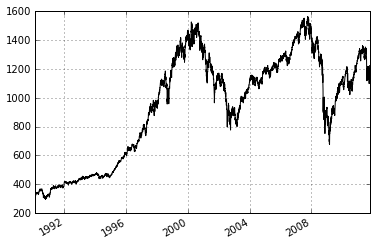

In [65]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('pydata-book/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

In [66]:
#crisis_data = [
#    (datetime(2007, 10, 11), 'Peak of bull market'),
#    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
#    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
#]
crisis_data = [
    (datetime(2007, 10, 11), u'上昇相場のピーク'), 
    (datetime(2008, 3, 12), u'ベア・スターンズ危機'), 
    (datetime(2008, 9, 15), u'リーマン破綻')
]

In [67]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

In [68]:
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

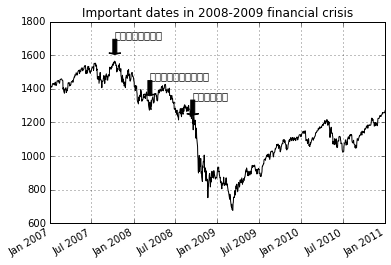

In [69]:
fig

## 8.2 pandasのプロット関数

### 8.2.1 折れ線グラフ

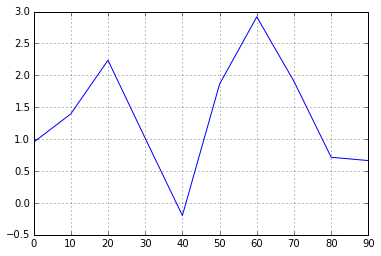

In [70]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

In [71]:
df = DataFrame(np.random.randn(10, 4).cumsum(0), 
              columns=['A', 'B', 'C', 'D'], 
              index = np.arange(0, 100, 10))
df

,A,B,C,D
0,1.456541,1.587303,-0.171903,-0.851827
10,2.353325,1.573566,0.271160,-0.645624
20,2.071074,1.427655,0.963204,-0.896427
30,1.911163,-0.260154,0.641506,-1.495984
40,2.588548,-0.223182,-0.185543,-2.147767
50,1.114857,-0.042992,0.407311,-0.908973
60,1.085542,-0.863033,0.397206,0.496704
70,-0.556444,0.706379,0.078024,-0.224314
80,0.590247,0.336807,-0.494220,0.664947
90,-0.890151,1.440687,-0.374514,3.469363


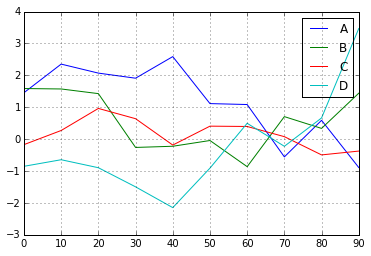

In [72]:
df.plot()

### 8.2.2 棒グラフ

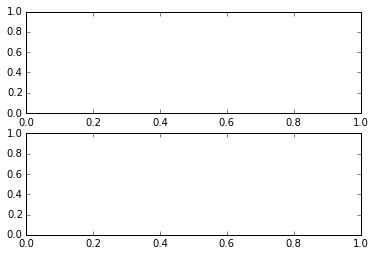

In [74]:
fig, axes = plt.subplots(2, 1)

In [75]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [76]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)

In [78]:
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

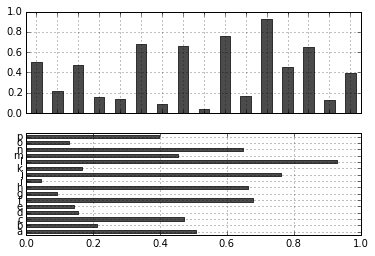

In [79]:
fig

In [80]:
df = DataFrame(np.random.rand(6, 4), 
              index = ['one', 'two', 'three', 'four', 'five', 'six'], 
              columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.533993,0.338063,0.973290,0.395875
two,0.244524,0.023883,0.762366,0.521240
three,0.170949,0.726412,0.475530,0.342850
four,0.068599,0.041661,0.297617,0.049826
five,0.185433,0.606961,0.902968,0.105355
six,0.859552,0.804247,0.959141,0.928508


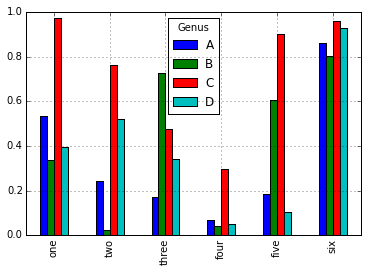

In [81]:
df.plot(kind='bar')

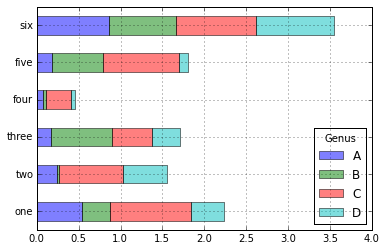

In [82]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [83]:
###

In [87]:
tips = pd.read_csv('pydata-book/ch08/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [90]:
party_counts = party_counts.ix[:, 2:5]
# データが少ない部分を切る

In [91]:
# 合計が1になるように正規化
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


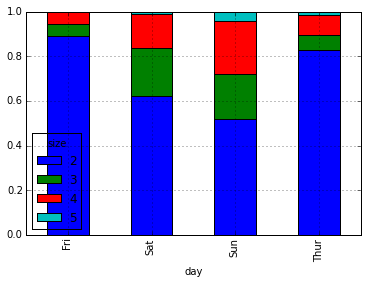

In [92]:
party_pcts.plot(kind='bar', stacked=True)

### 8.2.3 ヒストグラムと密度プロット

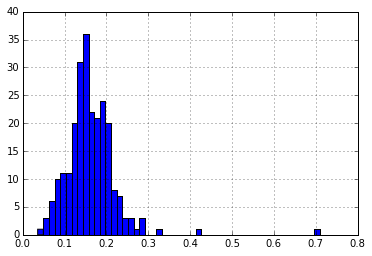

In [93]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

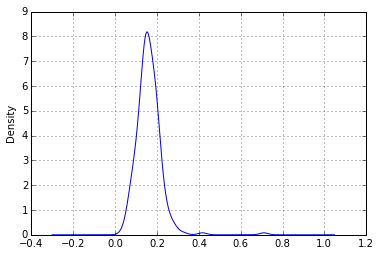

In [95]:
# カーネル密度推定
## kde を指定すると、混合正規分布で密度推定
tips['tip_pct'].plot(kind='kde')

In [96]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = Series(np.concatenate([comp1, comp2]))

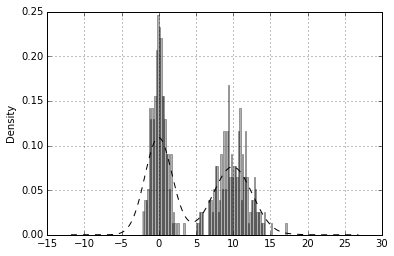

In [99]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### 8.2.4 散布図

In [100]:
macro = pd.read_csv('pydata-book/ch08/macrodata.csv')

In [101]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [102]:
trans_data = np.log(data).diff().dropna()

In [103]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


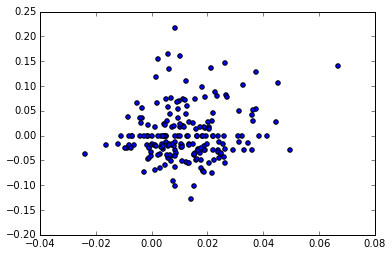

In [104]:
plt.scatter(trans_data['m1'], trans_data['unemp'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10df37610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1110a09d0>]], dtype=object)

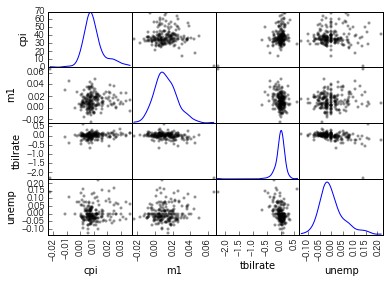

In [106]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 8.3 地図のプロット：ハイチ地震災害のデータ

In [107]:
data = pd.read_csv('pydata-book/ch08/Haiti.csv')

In [108]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [109]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [110]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [111]:
# CATEGORY カラムに異常値が入っている
data[data['CATEGORY'].isnull()]['CATEGORY']

1198    NaN
1531    NaN
1828    NaN
2620    NaN
2622    NaN
2623    NaN
Name: CATEGORY, dtype: object

In [112]:
# 位置情報にも異常値が含まれる
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [113]:
# 異常値を取り除く
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & 
           (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

In [114]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [115]:
# get_english のテスト
get_english('2. Urgences logistique | Vital Lines')

('2', 'Vital Lines')

In [116]:
all_cats = get_all_categories(data.CATEGORY)

In [117]:
english_mapping = dict(get_english(x) for x in all_cats)

In [118]:
english_mapping['2a']

'Food Shortage'

In [125]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [127]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

dummy_frame[:5]

,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
data = data.join(dummy_frame.add_prefix('cat_'))

In [145]:
from mpl_toolkits import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

ImportError: No module named basic_haiti_map

AttributeError: 'module' object has no attribute 'basic_haiti_map'

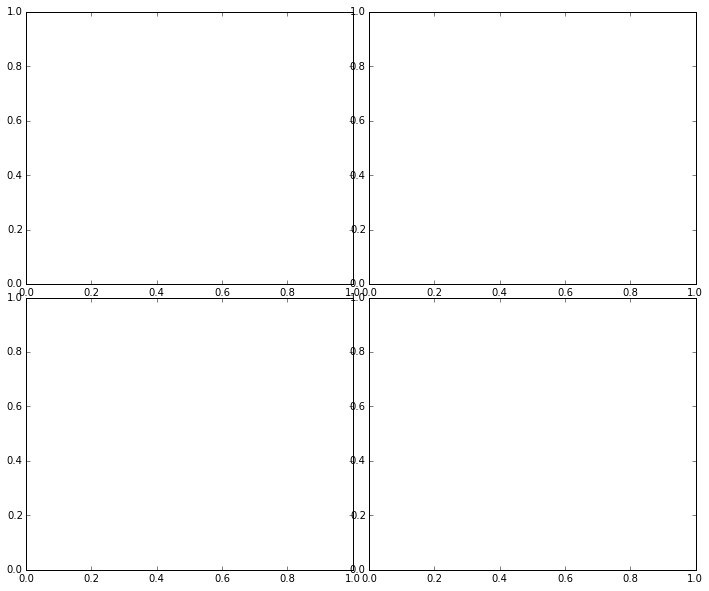

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))